In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('loan_data_set.csv')

# Checking missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# Handling missing values
# Categorical variables: fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerical variables: fill with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv('loan_data_cleaned_missing_values.csv', index=False)
print("\nCleaned dataset saved as 'loan_data_cleaned_missing_values.csv'")

Missing Values Before Cleaning:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values After Cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Cleaned dataset saved as 'loan_data_cleaned_missing_values.csv'


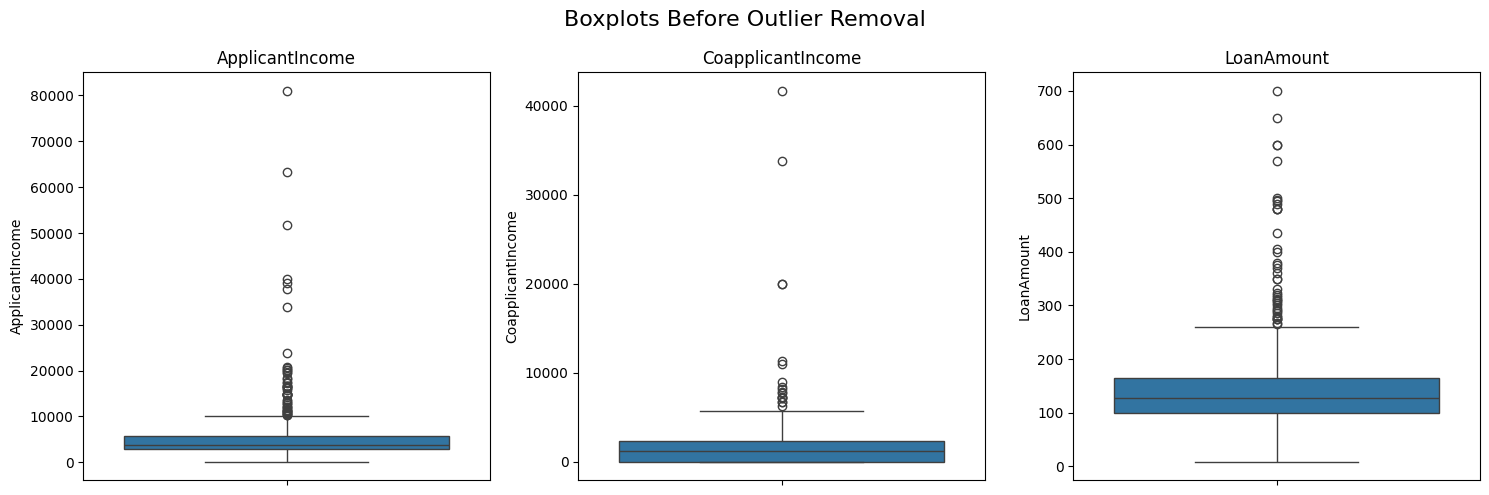

Dataset size before outlier removal: 614
Dataset size after outlier removal: 520


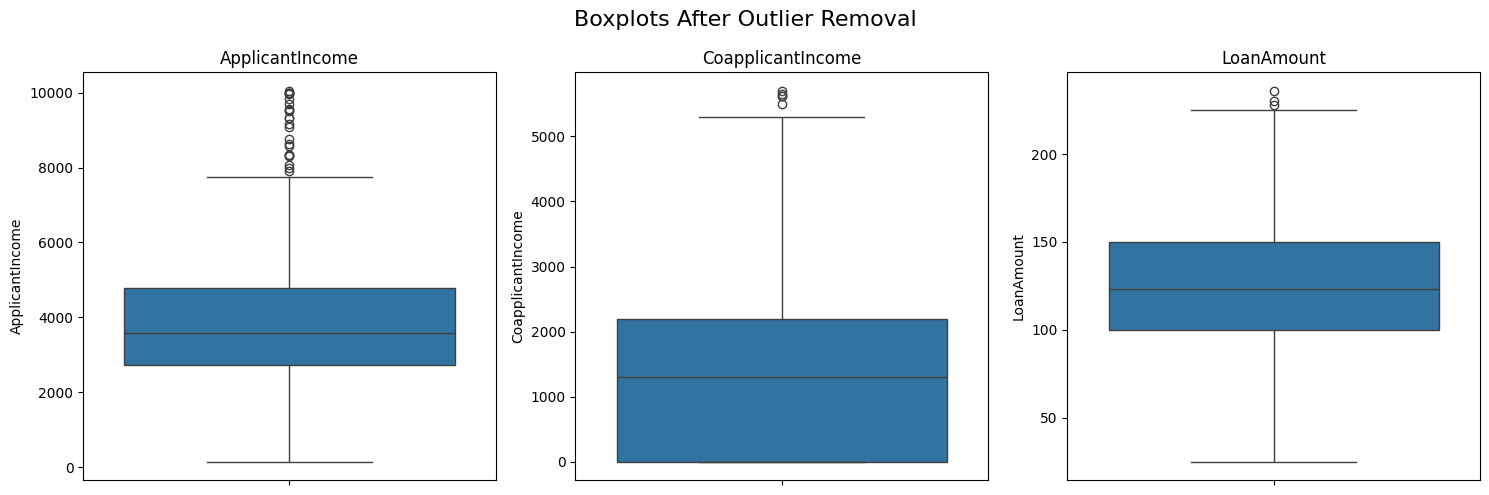


Cleaned dataset saved as 'loan_data_cleaned_outliers.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 
df = pd.read_csv('loan_data_cleaned_missing_values.csv')

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Numerical columns for outlier detection
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Plot boxplots before outlier removal
plt.figure(figsize=(15, 5))
plt.suptitle('Boxplots Before Outlier Removal', fontsize=16)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplots_before_outlier_removal.png')
plt.show()

# Applying outlier removal
print("Dataset size before outlier removal:", len(df))
df_cleaned = df.copy()
for col in numerical_cols:
    df_cleaned = remove_outliers(df_cleaned, col)
print("Dataset size after outlier removal:", len(df_cleaned))

# Plot boxplots after outlier removal
plt.figure(figsize=(15, 5))
plt.suptitle('Boxplots After Outlier Removal', fontsize=16)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplots_after_outlier_removal.png')
plt.show()

# Save the cleaned dataset
df_cleaned.to_csv('loan_data_cleaned_outliers.csv', index=False)
print("\nCleaned dataset saved as 'loan_data_cleaned_outliers.csv'")


Descriptive Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       520.000000         520.000000  520.000000        520.000000   
mean       3995.719231        1317.578692  123.651923        342.576923   
std        1794.687196        1397.402837   39.749892         65.618547   
min         150.000000           0.000000   25.000000         12.000000   
25%        2724.500000           0.000000  100.000000        360.000000   
50%        3590.500000        1293.500000  123.000000        360.000000   
75%        4772.750000        2191.000000  150.000000        360.000000   
max       10047.000000        5701.000000  236.000000        480.000000   

       Credit_History  
count      520.000000  
mean         0.851923  
std          0.355518  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


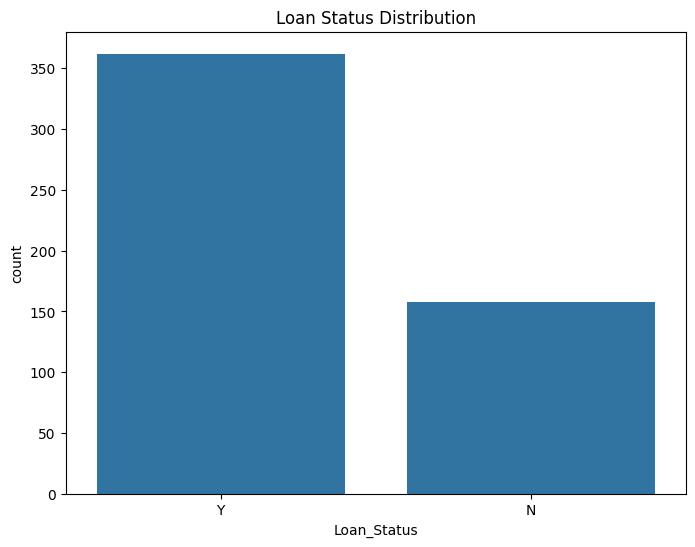

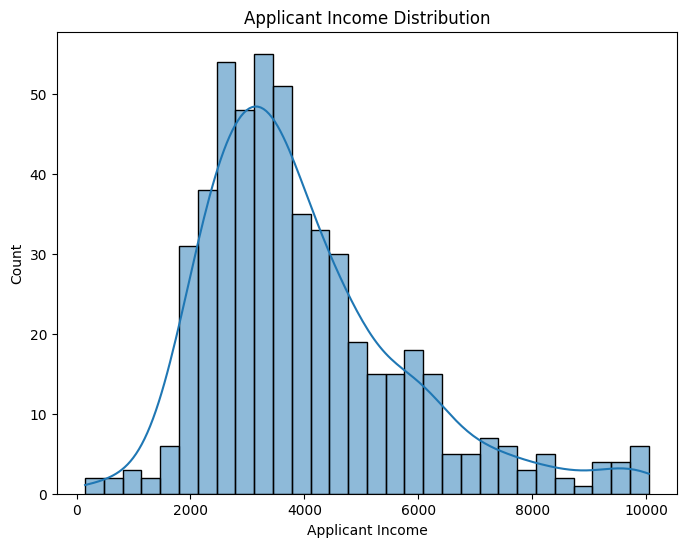

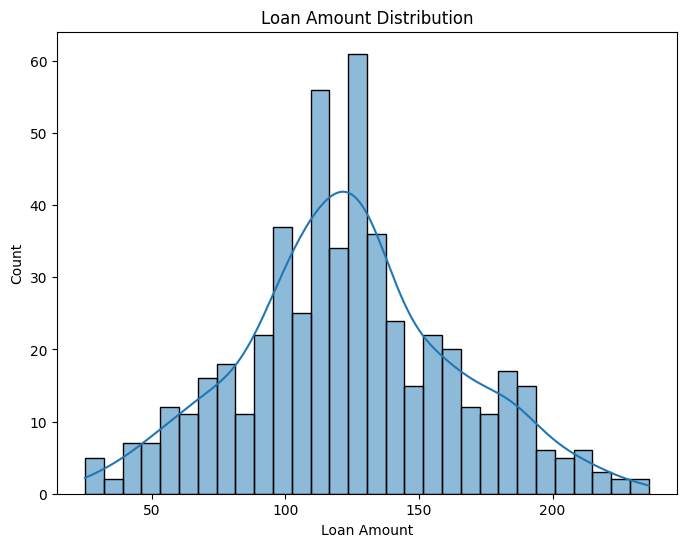

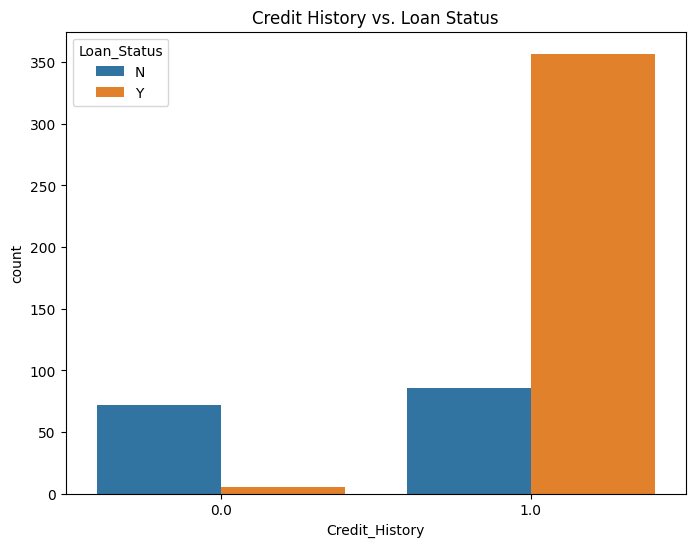

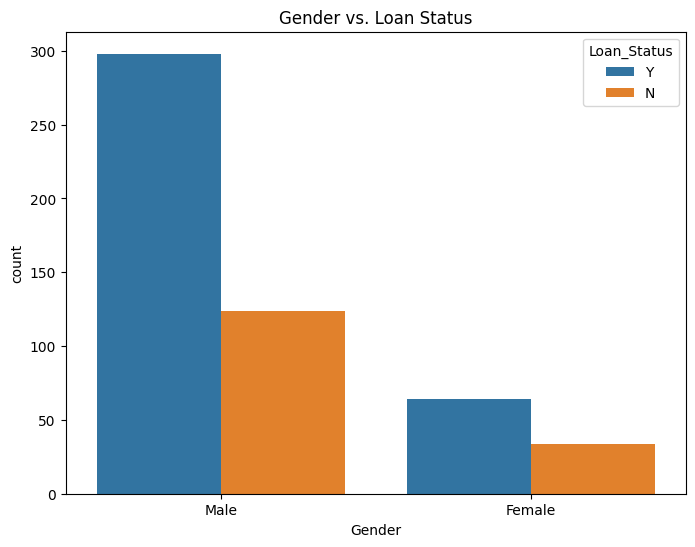

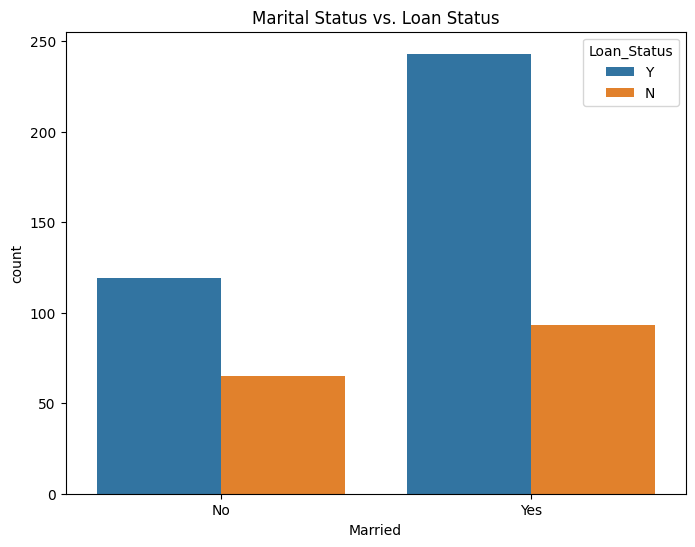

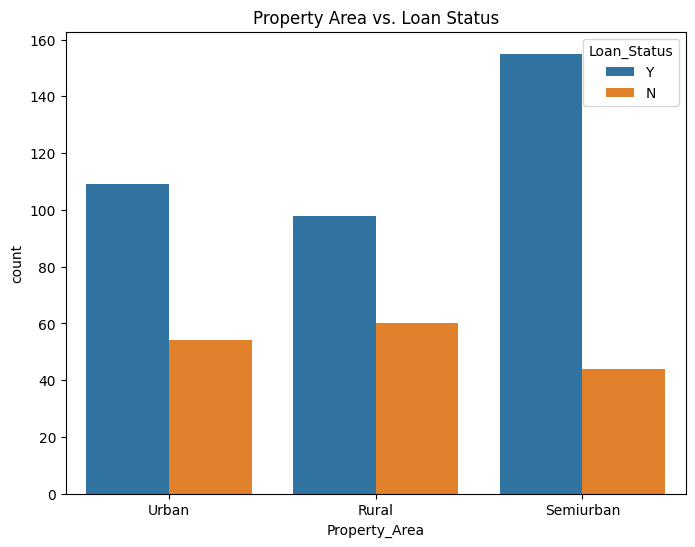

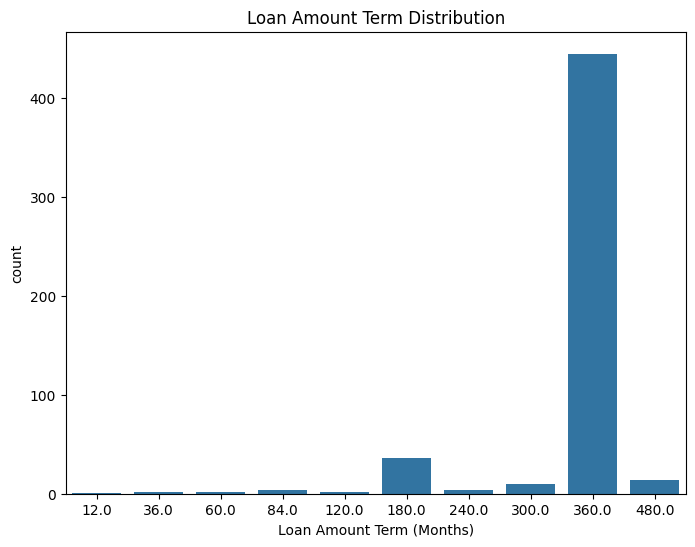


Loan Approval Rate by Credit History:
Loan_Status            N         Y
Credit_History                    
0.0             0.935065  0.064935
1.0             0.194131  0.805869

Loan Approval Rate by Marital Status:
Loan_Status         N         Y
Married                        
No           0.353261  0.646739
Yes          0.276786  0.723214

Loan Approval Rate by Property Area:
Loan_Status           N         Y
Property_Area                    
Rural          0.379747  0.620253
Semiurban      0.221106  0.778894
Urban          0.331288  0.668712


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset (assuming outliers and missing values are handled)
df = pd.read_csv('loan_data_cleaned_outliers.csv')

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Distribution of target variable (Loan_Status)
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.savefig('loan_status_distribution.png')
plt.show()

# Income distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.savefig('income_distribution.png')
plt.show()

# Loan amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.savefig('loan_amount_distribution.png')
plt.show()

# Credit history vs. Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History vs. Loan Status')
plt.savefig('credit_history_vs_loan_status.png')
plt.show()

# Demographic factors: Gender vs. Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs. Loan Status')
plt.savefig('gender_vs_loan_status.png')
plt.show()

# Demographic factors: Married vs. Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Marital Status vs. Loan Status')
plt.savefig('married_vs_loan_status.png')
plt.show()

# Property Area vs. Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs. Loan Status')
plt.savefig('property_area_vs_loan_status.png')
plt.show()

# Loan Amount Term distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Amount_Term', data=df)
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term (Months)')
plt.savefig('loan_amount_term_distribution.png')
plt.show()

# Additional statistical insights
print("\nLoan Approval Rate by Credit History:")
credit_approval = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
print(credit_approval)

print("\nLoan Approval Rate by Marital Status:")
married_approval = df.groupby('Married')['Loan_Status'].value_counts(normalize=True).unstack()
print(married_approval)

print("\nLoan Approval Rate by Property Area:")
property_approval = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()
print(property_approval)

In [4]:
import pandas as pd
import numpy as np

# Loading the dataset (assuming missing values and outliers are handled)
df = pd.read_csv('loan_data_cleaned_outliers.csv')

# Feature Extraction
# 1. Combined household income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# 2. EMI calculation
# Assuming an annual interest rate of 10% (0.10), converting to monthly rate
annual_interest_rate = 0.10
monthly_interest_rate = annual_interest_rate / 12

# EMI calculation function
def calculate_emi(loan_amount, loan_term, monthly_rate):
    # If loan_term or loan_amount is missing or zero, return 0
    if pd.isna(loan_amount) or pd.isna(loan_term) or loan_amount == 0 or loan_term == 0:
        return 0
    # EMI formula: [P * r * (1+r)^n] / [(1+r)^n - 1]
    n = loan_term  # Loan term in months
    r = monthly_rate
    emi = (loan_amount * r * (1 + r)**n) / ((1 + r)**n - 1)
    return emi

# Apply EMI calculation to each row
df['EMI'] = df.apply(lambda row: calculate_emi(row['LoanAmount'], row['Loan_Amount_Term'], monthly_interest_rate), axis=1)

# Display the first few rows of the dataset with new features
print("Dataset with Extracted Features (First 5 Rows):")
print(df[['Total_Income', 'EMI']].head())

# Save the dataset with extracted features
df.to_csv('loan_data_with_total_income_emi.csv', index=False)
print("\nDataset with extracted features saved as 'loan_data_with_total_income_emi.csv'")

Dataset with Extracted Features (First 5 Rows):
   Total_Income       EMI
0        5849.0  1.123292
1        6091.0  1.123292
2        3000.0  0.579197
3        4941.0  1.053086
4        6000.0  1.237376

Dataset with extracted features saved as 'loan_data_with_total_income_emi.csv'


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Loading the dataset with engineered features
df = pd.read_csv('loan_data_with_total_income_emi.csv')

# Feature Encoding
# 1. Label Encoding for ordinal variables
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y -> 1, N -> 0

# Handle Dependents: Replace '3+' with '3' and convert to integer
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

# 2. One-Hot Encoding for nominal variables
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Concatenate encoded columns and drop original categorical columns
df = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)

# Feature Scaling
# Numerical columns to scale
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'EMI']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the preprocessed dataset
print("Preprocessed Dataset (First 5 Rows):")
print(df.head())

# Save the preprocessed dataset
df.to_csv('loan_data_preprocessed.csv', index=False)
print("\nPreprocessed dataset saved as 'loan_data_preprocessed.csv'")

Preprocessed Dataset (First 5 Rows):
    Loan_ID  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0  LP001002           0         1.033643          -0.943785    0.109491   
1  LP001003           1         0.327548           0.136399    0.109491   
2  LP001005           0        -0.555349          -0.943785   -1.451763   
3  LP001006           0        -0.787925           0.745256   -0.091961   
4  LP001008           0         1.117861          -0.943785    0.436851   

   Loan_Amount_Term  Credit_History  Loan_Status  Total_Income       EMI  \
0          0.265776             1.0            1      0.275027 -0.036295   
1          0.265776             1.0            0      0.399269 -0.036295   
2          0.265776             1.0            1     -1.187637 -0.989346   
3          0.265776             1.0            1     -0.191136 -0.159269   
4          0.265776             1.0            1      0.352550  0.163538   

   Gender_Male  Married_Yes  Education_Not Graduate  Se

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the preprocessed dataset
df = pd.read_csv('loan_data_preprocessed.csv')

# Splitting features and target
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Drop Loan_ID as it is not a feature
y = df['Loan_Status']

# Split data into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Perform 5-fold cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Train model on full training set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate test set accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Mean CV Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': test_accuracy
    }
    
    print(f"{name}:")
    print(f"  Mean CV Accuracy = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  Test Accuracy = {test_accuracy:.4f}\n")

# Identify the best model based on test accuracy
best_model_name = max(results, key=lambda x: results[x]['Test Accuracy'])
best_test_accuracy = results[best_model_name]['Test Accuracy']
print(f"Best Model: {best_model_name} with Test Accuracy = {best_test_accuracy:.4f}")

# Save results to a CSV file
results_df = pd.DataFrame({
    'Model': [name for name in results],
    'Mean CV Accuracy': [results[name]['Mean CV Accuracy'] for name in results],
    'CV Std': [results[name]['CV Std'] for name in results],
    'Test Accuracy': [results[name]['Test Accuracy'] for name in results]
})
results_df.to_csv('model_training_results.csv', index=False)
print("\nModel training results saved as 'model_training_results.csv'")

Logistic Regression:
  Mean CV Accuracy = 0.8196 (±0.0279)
  Test Accuracy = 0.8173

Decision Tree:
  Mean CV Accuracy = 0.7187 (±0.0476)
  Test Accuracy = 0.7115

Random Forest:
  Mean CV Accuracy = 0.8051 (±0.0358)
  Test Accuracy = 0.8173

XGBoost:
  Mean CV Accuracy = 0.7908 (±0.0506)
  Test Accuracy = 0.7885

Support Vector Machine:
  Mean CV Accuracy = 0.8172 (±0.0262)
  Test Accuracy = 0.7885

K-Nearest Neighbors:
  Mean CV Accuracy = 0.7213 (±0.0307)
  Test Accuracy = 0.7019

Best Model: Logistic Regression with Test Accuracy = 0.8173

Model training results saved as 'model_training_results.csv'


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8244406196213425

Tuned model saved as 'tuned_logistic_regression.pkl'

Test Set Performance Metrics:
Accuracy: 0.8269
Precision: 0.8140
Recall: 0.9722
F1 Score: 0.8861
ROC AUC: 0.8099

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        32
           1       0.81      0.97      0.89        72

    accuracy                           0.83       104
   macro avg       0.85      0.74      0.76       104
weighted avg       0.84      0.83      0.81       104



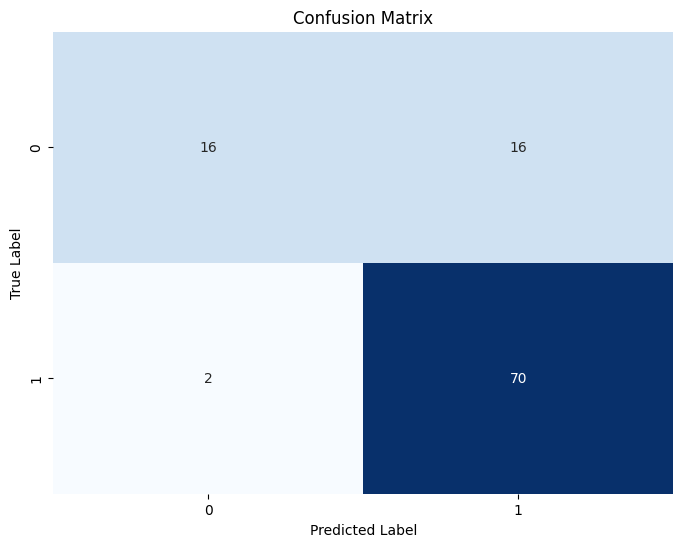


Model tuning results saved as 'model_tuning_logistic_regression_results.csv'


In [10]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Load the preprocessed dataset
df = pd.read_csv('loan_data_preprocessed.csv')

# Splitting features and target
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Drop Loan_ID as it is not a feature
y = df['Loan_Status']

# Split data into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameter search space for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize Logistic Regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# Fit grid search on training data
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Grid search failed with error: {e}")
    raise

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model to a .pkl file
best_model = grid_search.best_estimator_
with open('tuned_logistic_regression.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("\nTuned model saved as 'tuned_logistic_regression.pkl'")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()

# Save the results
results = {
    'Best Parameters': [grid_search.best_params_],
    'Best CV Accuracy': grid_search.best_score_,
    'Test Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}
results_df = pd.DataFrame(results)
results_df.to_csv('model_tuning_logistic_regression_results.csv', index=False)
print("\nModel tuning results saved as 'model_tuning_logistic_regression_results.csv'")